In [51]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:

with pymysql.connect(
    host="localhost",
    user="pedro",
    password="12345",
    database="bank_db",
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
) as conn:
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM churners;')
    data = cursor.fetchall()

In [56]:
df = pd.DataFrame(data)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418,0,3418,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313,2517,796,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716,0,4716,2.175,816,28,2.500,0.000


# EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  int64  
 14  Total_

In [119]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Attrited Customer': 'Churned',
                                                     'Existing Customer': 'Existing'})
df.rename(columns={'Attrition_Flag':'Churn'}, inplace=True)                                                     

# Churn distribution
churn_counts = df['Churn'].value_counts()
print(churn_counts,'\n')
churn_rates = df['Churn'].value_counts()/len(df)*100
print(churn_rates)
# Existing Customer


Churn
Existing    8500
Churned     1627
Name: count, dtype: int64 

Churn
Existing    83.934038
Churned     16.065962
Name: count, dtype: float64


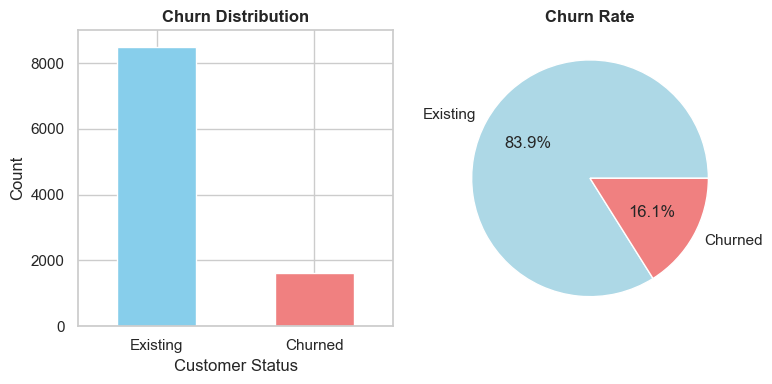

Churn rate: 16.07%


In [146]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
churn_counts.plot(kind='bar', color=['skyblue','lightcoral'])
plt.title('Churn Distribution', fontweight='bold')
plt.xlabel('Customer Status')
plt.ylabel('Count') 
plt.xticks(rotation=0)
plt.ylim(0,9000)
plt.yticks(range(0, 9001, 2000))

plt.subplot(1,2,2)
plt.pie(churn_counts, 
        labels=churn_counts.index, 
        autopct="%1.1f%%", 
        colors=['lightblue', 'lightcoral'])
plt.title('Churn Rate', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Churn rate: {churn_rates['Churned']:.2f}%")

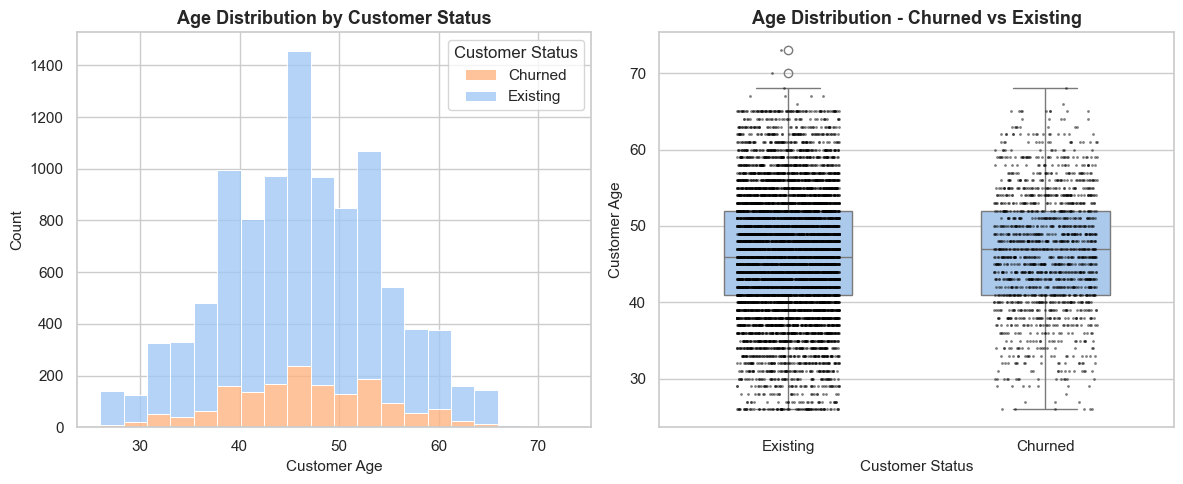

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(
    data=df,
    x='Customer_Age',
    hue='Churn',
    bins=20,
    alpha=0.8,
    multiple='stack',
    edgecolor='white',
    linewidth=0.7
)
plt.title('Age Distribution by Customer Status', fontsize=13, weight='bold')
plt.xlabel('Customer Age', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.legend(title='Customer Status', loc='upper right', labels=['Churned', 'Existing'])

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df,
    x='Churn',
    y='Customer_Age',
    width=0.5,
    boxprops=dict(alpha=0.8)
)
sns.stripplot(  # Data points for detail
    data=df,
    x='Churn',
    y='Customer_Age',
    color='black',
    size=2,
    jitter=0.2,
    alpha=0.5
)
plt.title('Age Distribution - Churned vs Existing', fontsize=13, weight='bold')
plt.xlabel('Customer Status', fontsize=11)
plt.ylabel('Customer Age', fontsize=11)

plt.tight_layout()
plt.show()


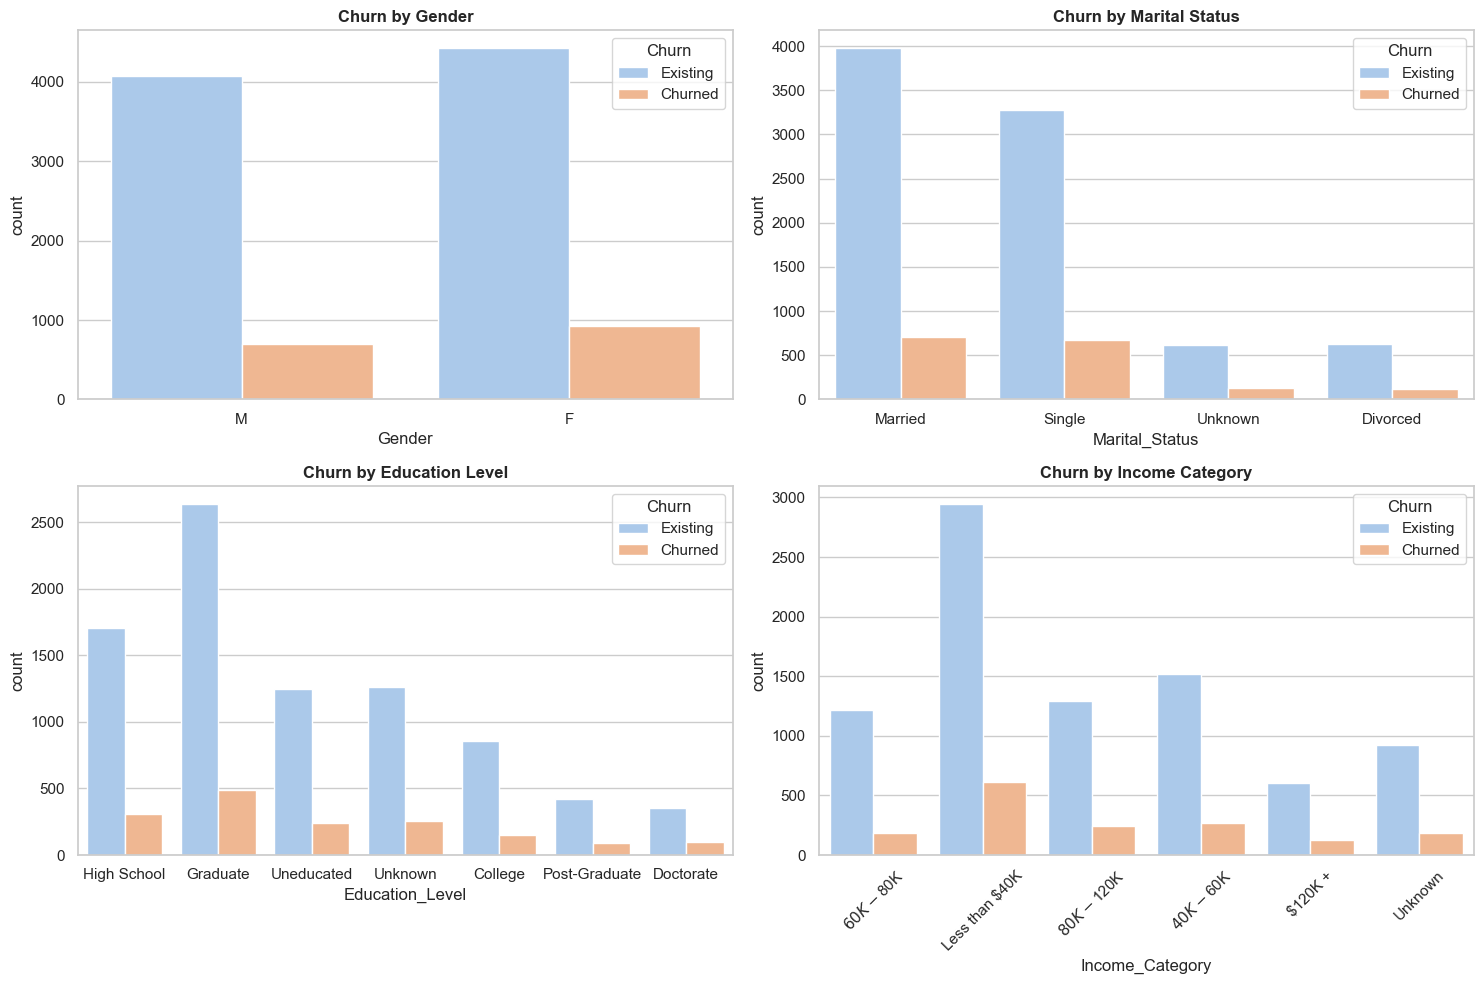

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender analysis
gender_churn = pd.crosstab(df['Gender'], df['Churn'], normalize='index') * 100
sns.countplot(data=df, x='Gender', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Gender', fontweight='bold')

# Marital status
sns.countplot(data=df, x='Marital_Status', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Marital Status', fontweight='bold')
plt.xticks(rotation=45)

# Education level
sns.countplot(data=df, x='Education_Level', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('Churn by Education Level', fontweight='bold')
plt.xticks(rotation=45)

# Income category
sns.countplot(data=df, x='Income_Category', hue='Churn', ax=axes[1,1])
axes[1,1].set_title('Churn by Income Category', fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

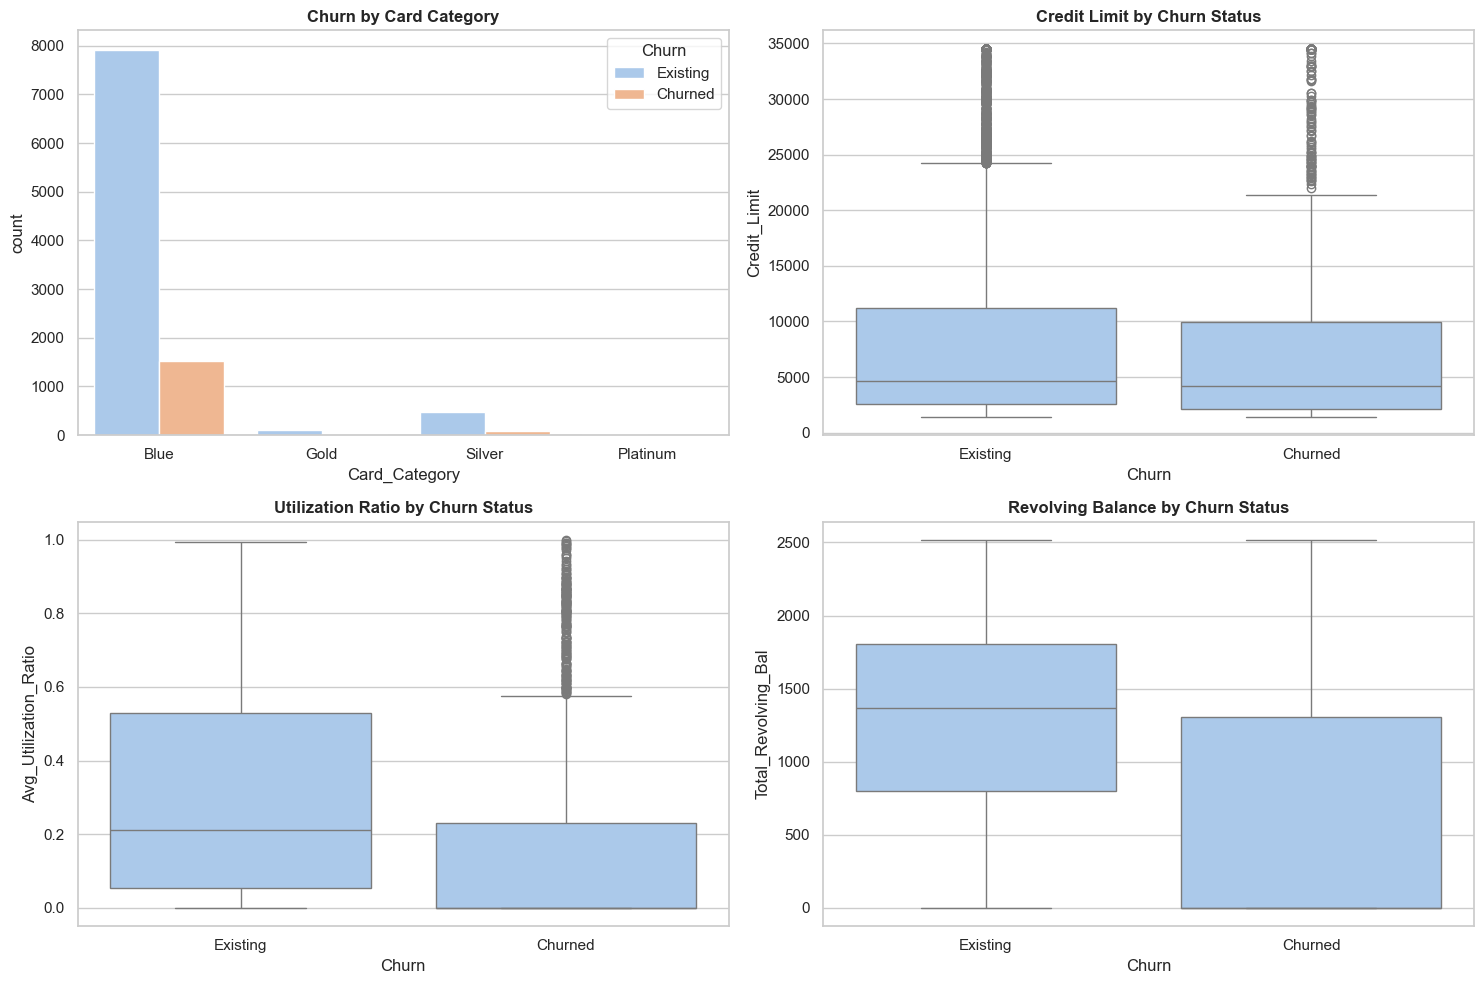

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Card category
sns.countplot(data=df, x='Card_Category', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Card Category', fontweight='bold')

# Credit limit distribution
sns.boxplot(data=df, x='Churn', y='Credit_Limit', ax=axes[0,1])
axes[0,1].set_title('Credit Limit by Churn Status', fontweight='bold')

# Utilization ratio
sns.boxplot(data=df, x='Churn', y='Avg_Utilization_Ratio', ax=axes[1,0])
axes[1,0].set_title('Utilization Ratio by Churn Status', fontweight='bold')

# Revolving balance
sns.boxplot(data=df, x='Churn', y='Total_Revolving_Bal', ax=axes[1,1])
axes[1,1].set_title('Revolving Balance by Churn Status', fontweight='bold')

plt.tight_layout()
plt.show()

In [153]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop('CLIENTNUM')
df[numeric_cols].describe()


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.938679,1162.814061,7469.124617,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.788539,814.987335,9090.695763,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.000000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


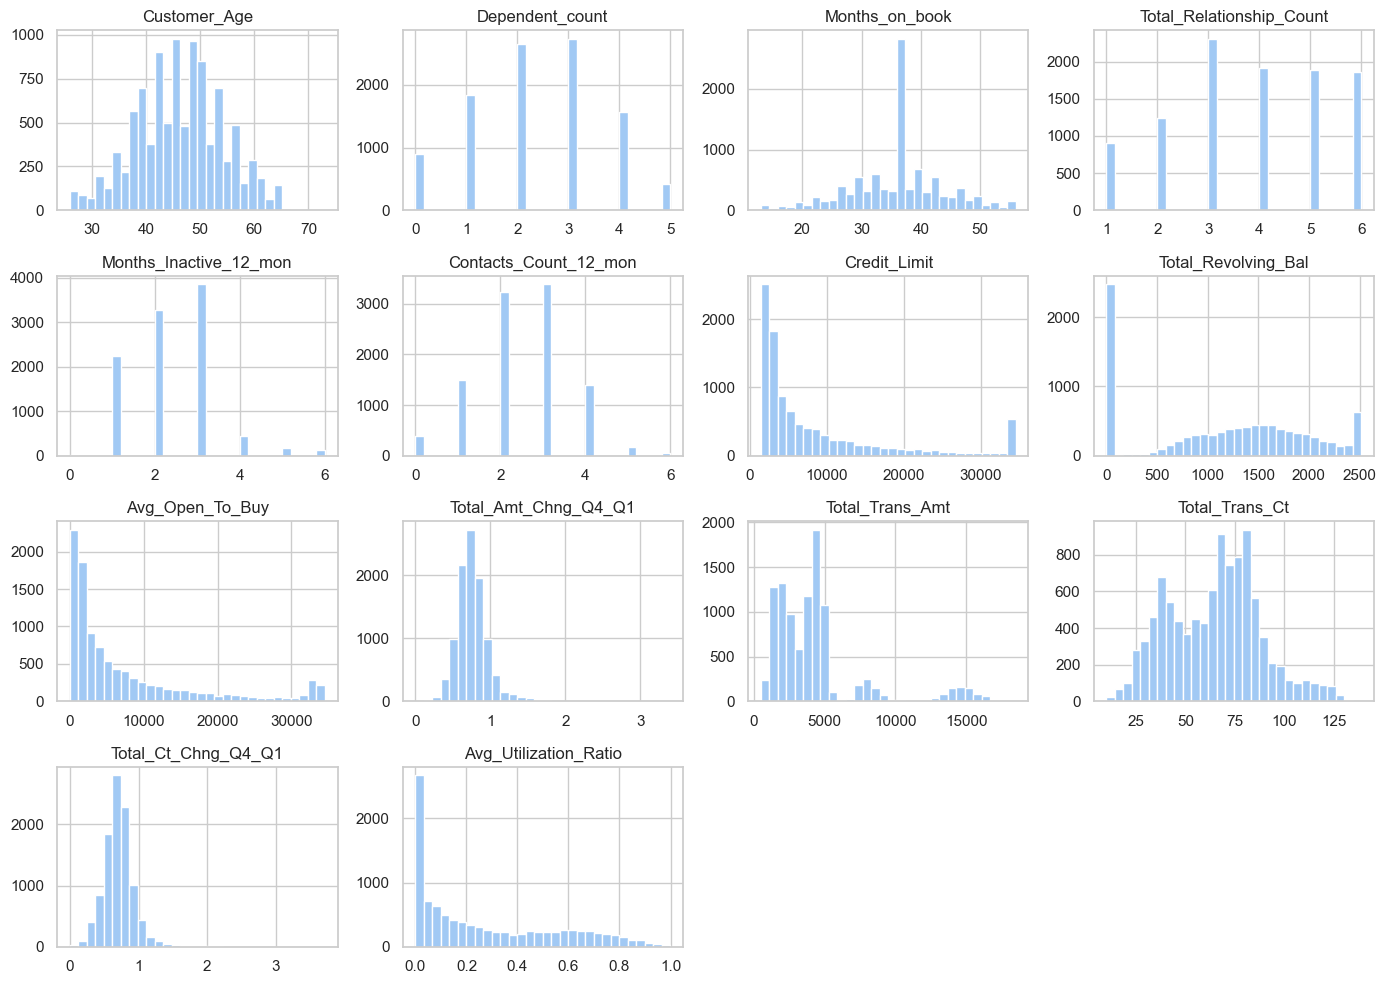

In [154]:
df[numeric_cols].hist(figsize=(14,10), bins=30)
plt.tight_layout()
plt.show()


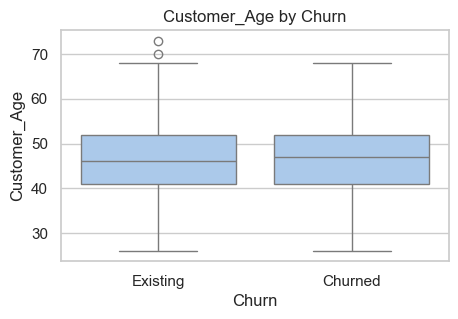

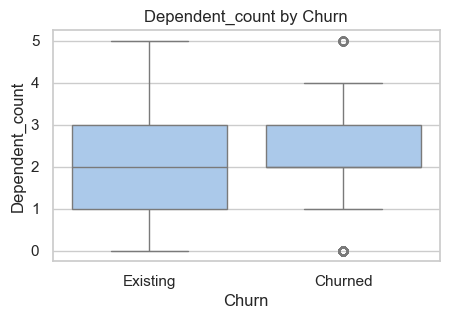

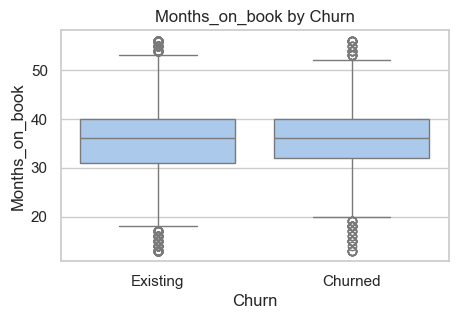

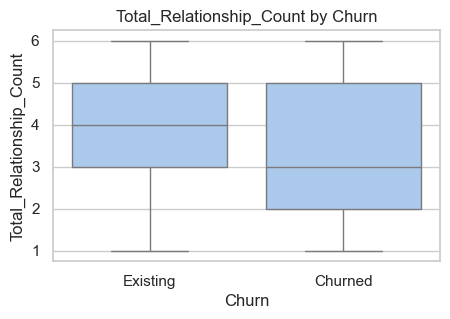

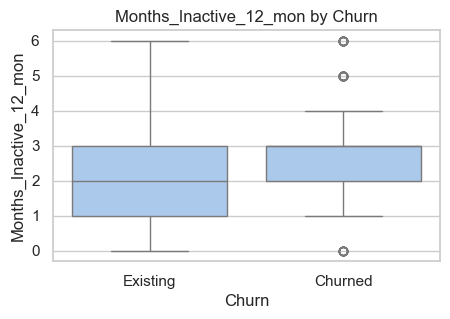

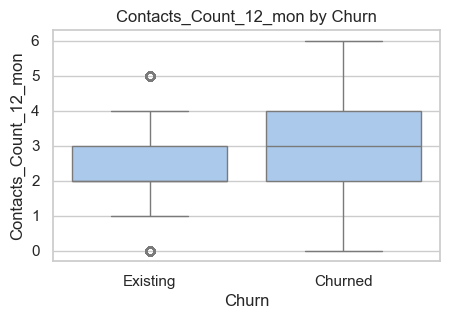

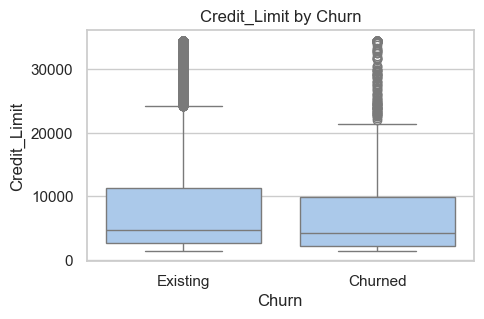

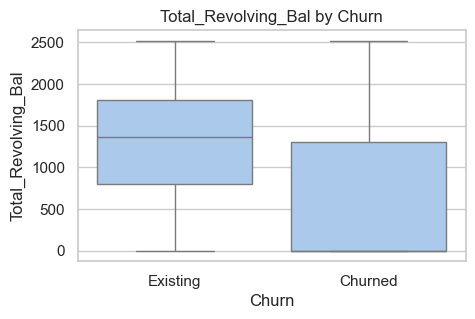

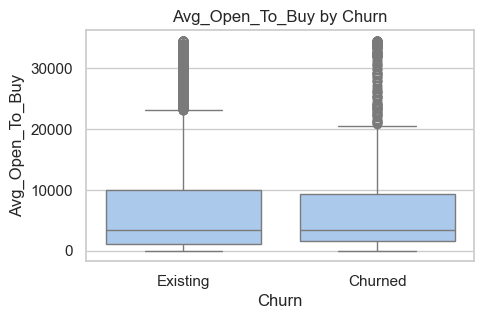

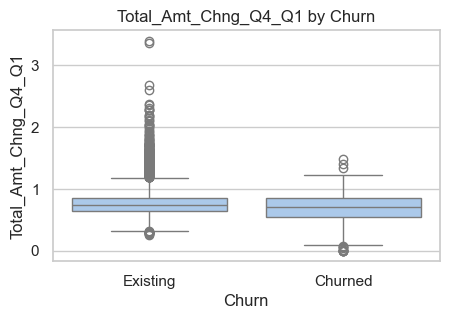

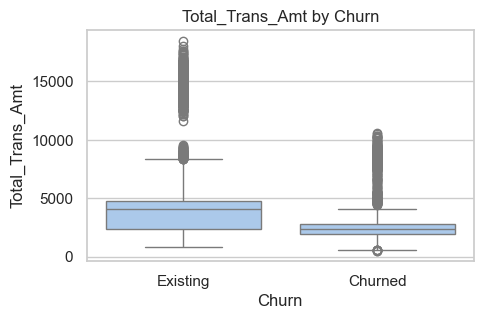

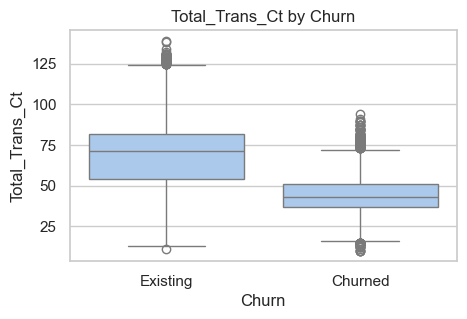

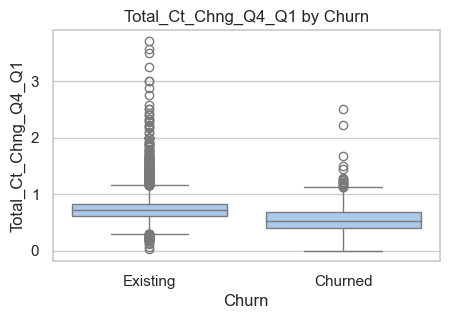

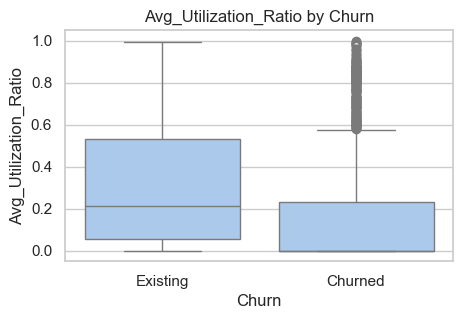

In [155]:
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} by Churn')
    plt.show()
